In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Generate X, Y

In [2]:
def generateDataSet(m):
    x = np.random.randn(m) * 10  # -10 - 10
    # print(x.mean(), x.std())
    noise = np.random.randn(m)
    y = 3 * x + 1 + 4 * noise
    return x, y

In [18]:
x,y = generateDataSet(100)
print(x.shape, y.shape)
# x

(100,) (100,)


array([ 14.81770266,   1.76924733,   9.08434336,  -8.07038052,
         0.26101016,  -2.49515464,   6.04291678, -10.81504039,
        -1.04599902,  -9.9985471 ,  -2.96753961,   0.47545684,
       -21.47890126,   5.8339643 ,   6.65338551,  -1.51141483,
        -4.01392804, -11.45926854,  -6.83723948,  -3.02200157,
         1.46314695,   7.08785799, -15.24900747,   8.30678647,
         0.58484437,  12.98234645,   0.63285775, -11.24655337,
         4.03903383,   7.71083027,  -7.03263888, -14.33803663,
        -2.61063261,  -7.03398622, -15.51342319, -10.81985072,
        30.27591093,   3.80035047,   0.59578373,  -8.0751647 ,
       -10.5960429 ,   6.50659746,   0.55442277,   1.59633572,
        -4.61773215,   9.55665979,   6.29189774,  -5.56932344,
       -21.55386752,   4.22468884,   3.60266009, -19.80018488,
        14.9714478 ,  21.10999735,  -3.87892618, -18.07422815,
       -15.30051849,   0.37506118,  -1.06004685,   3.4322514 ,
        -4.68628165,   5.24815441,   5.87094647,  10.98

In [4]:
def plotData(x, y, color="orange", title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(x, y, c=color)
    plt.show()

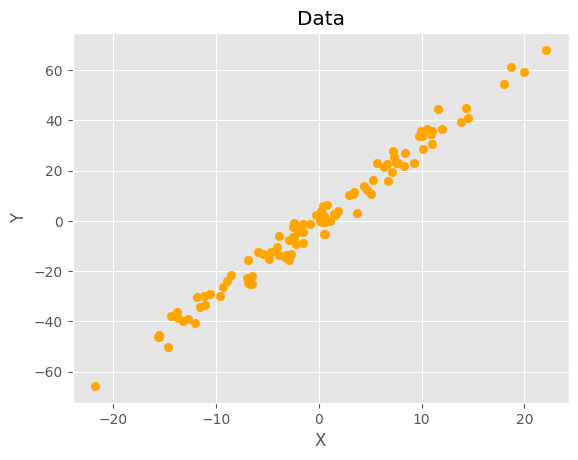

In [5]:
plotData(x, y)

In [12]:
def normaliseData(X):
    X = (X - X.mean()) / X.std()
    return X

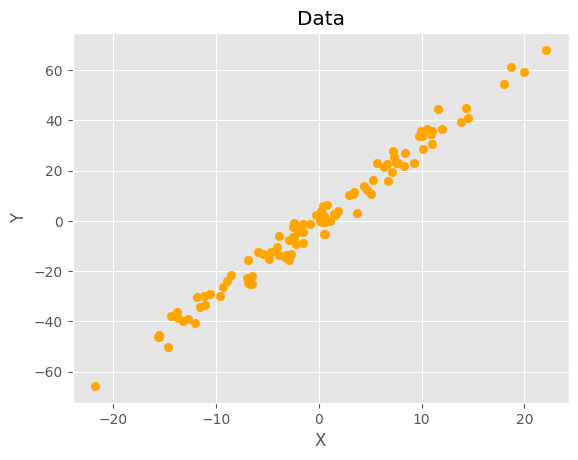

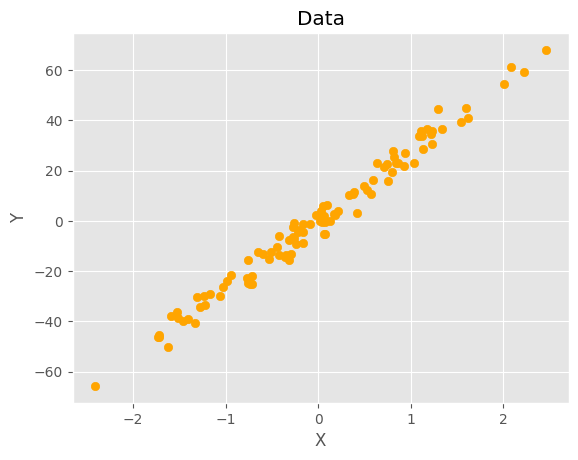

In [13]:
plotData(x, y)
x = normaliseData(x)  # Data region ranges between -1 to 1
plotData(x, y)

In [16]:
# Creating Test Set
def trainTestSplit(x, y, split=0.8):
    m = x.shape[0]
    data = np.zeros((m, 2))
    
    data[:, 0] = x
    data[:, 1] = y
    
    np.random.shuffle(data)
    
    split = int(m*split)
    
    #Train
    XT = data[:split, 0]  #0-79
    YT = data[:split, 1]
    
    #Test
    Xt = data[split: , 0]
    Yt = data[split: , 1]
    
    return XT, YT, Xt, Yt

In [17]:
XT, YT, Xt, Yt = trainTestSplit(x, y)

In [19]:
print(XT.shape, YT.shape)  # Train
print(Xt.shape, Yt.shape)  # Test

(80,) (80,)
(20,) (20,)


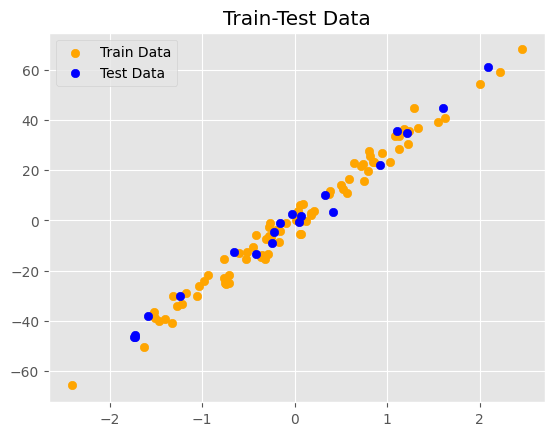

In [30]:
plt.scatter(XT, YT, color='orange', label="Train Data")
plt.scatter(Xt, Yt, color='blue', label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()